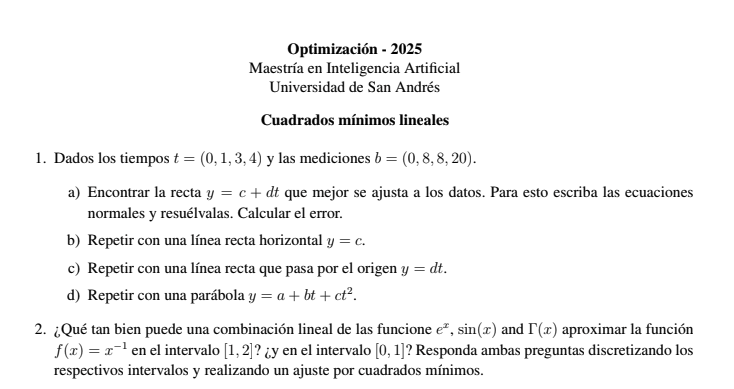

# Ejercicio 1

## Inciso A)

In [ ]:
# Importo librerías
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Datos
tiempos = np.array([0, 1, 3, 4])
mediciones = np.array([0, 8, 8, 20])

In [ ]:
# Partimos de la ecuación general de una recta, siendo bi las mediciones, Ti los tiempos, d la pendiente de la línea de ajuste y c un término constante (donde la línea cruza al eje y)
# bi = dTi + c
# (
    #T1   1
    #T2   1
    #T3   1
    #T4   1

#         )
# Si permitimos que la línea se desplace hacia arriba o abajo (que tenga un intercepto c), necesitamos agregar esa columna de unos. Esto se debe a que cada c se multiplica por 1 (que es constante para cada fila) para que Python lo pueda incluir en la cuenta.
A = np.array([[i, 1] for i in tiempos])
A

array([[0, 1],
       [1, 1],
       [3, 1],
       [4, 1]])

In [ ]:
# x* = (AT. A)^−1 . ATb --> Esto también se puede plantear como (AT. A). x* = ATb
# Uso numpy.linalg.solve para resolver el sistema de ecuaciones
# x tiene dos componentes: d que es la pendiente y c que es el intercepto
resultado_a = np.linalg.solve(A.T @ A, A.T @ mediciones)
resultado_a

array([4., 1.])

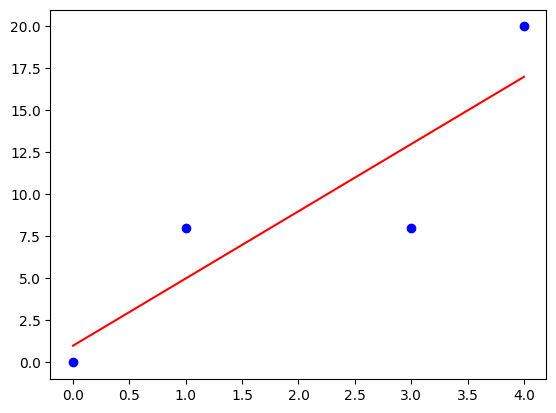

In [ ]:
plt.plot(tiempos, mediciones, "bo")  # Puntos originales
plt.plot(tiempos, 4 * tiempos + 1, "r-")  # Línea ajustada usando la fórmula y = 4t + 1
plt.show()

In [ ]:
# Calculo la línea ajustada usando los coeficientes encontrados
# resultado_a contiene [d, c] --> d = 4.0, c = 1.0
d, c = resultado_a

# Calculo las predicciones que hace nuestro modelo con los tiempos originales
mediciones_ajustadas_a = d * tiempos + c

# Calculo el error cuadrático total
error_cuadratico_total_a = np.sum((mediciones - mediciones_ajustadas_a) ** 2)

# Muestro el error
print(f"Error cuadrático total: {error_cuadratico_total_a:.2f}")

Error cuadrático total: 44.00


## Inciso B)

In [ ]:
# Antes, la matriz A tenía dos columnas: una con los tiempos (t) y otra con unos
# Ahora, como estamos buscando un valor constante, la matriz B es simplemente una columna de unos
# Necesitamos que bi = c
B = np.array([[1], [1], [1], [1]])
B

array([[1],
       [1],
       [1],
       [1]])

In [ ]:
# Aplicamos las ecuaciones normales: (B^T B)x = B^T b
resultado_b = np.linalg.solve(B.T @ B, B.T @ mediciones)
resultado_b

array([9.])

In [ ]:
c = resultado_b[0]

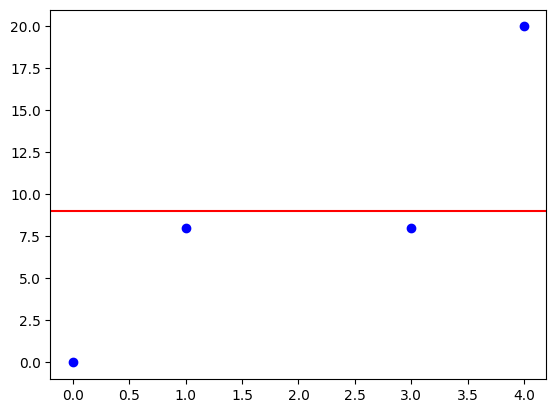

In [ ]:
# Ploteo los puntos originales
plt.plot(tiempos, mediciones, "bo", label = "Puntos originales")

# Ploteamos la línea horizontal ajustada (que simplemente es una línea constante en y = c)
plt.axhline(y = c, color = "r", linestyle = "-", label = f"Línea ajustada: y = {c:.2f}")

In [ ]:
# Calculo el error
mediciones_ajustadas_b = tiempos + c

In [ ]:
error_cuadratico_total_b = np.sum((mediciones - mediciones_ajustadas_b) ** 2)

In [ ]:
# Muestro el error
print(f"Error cuadrático total: {error_cuadratico_total_b:.2f}")

Error cuadrático total: 150.00


## Inciso c)

In [ ]:
# bi = dTi
C = np.array([[0],[1],[3],[4]])

In [ ]:
# El .shape me dice el número de filas por número de columnas de la matriz C
# Es fundamental que esta matriz sea una columna (shape: (4, 1)) para que las operaciones
C.shape

(4, 1)

In [ ]:
# Aplico las ecuaciones normales: (C^T . C)x = C^T b
resultado_c = np.linalg.solve(C.T @ C, C.T @ mediciones)

In [ ]:
d = resultado_c[0]
d

np.float64(4.3076923076923075)

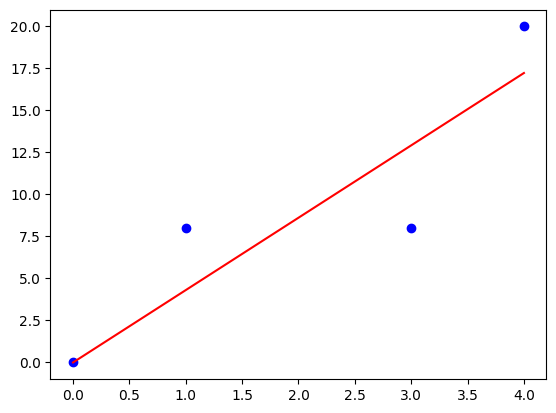

In [ ]:
# Puntos originales
plt.plot(tiempos, mediciones, "bo", label="Puntos originales")

# Línea de ajuste con la pendiente encontrada (d)
plt.plot(tiempos, d * tiempos, color="r", linestyle="-", label=f"Línea ajustada: y = {d:.2f}t")

In [ ]:
# Calculo los valores predichos
mediciones_ajustadas_c = d * tiempos

In [ ]:
# Calculo el error
error_cuadratico_total_c = np.sum((mediciones - mediciones_ajustadas_c) ** 2)

In [ ]:
# Muestro el error
print(f"Error cuadrático total: {error_cuadratico_total_c:.2f}")

Error cuadrático total: 45.54


## Inciso D)

In [ ]:
# bi = aTi ** 2 + bTi + c
# Construyo la matriz de parámetros
D = np.array([[t ** 2, t, 1] for t in tiempos])

In [ ]:
resultado_d = np.linalg.solve(D.T @ D, D.T @ mediciones)
resultado_d

array([0.66666667, 1.33333333, 2.        ])

In [ ]:
a = resultado_d[0]
b = resultado_d[1]
c = resultado_d[2]

In [ ]:
# Calculo los valores predichos
mediciones_ajustadas_d = c + b * tiempos + a * tiempos ** 2

In [ ]:
# Calculo el error cuadrático
error_cuadratico_total_d = np.sum((mediciones - mediciones_ajustadas_d) ** 2)

In [ ]:
# Muestro el error cuadrático
print(f"Error cuadrático total: {error_cuadratico_total_d:.2f}")

Error cuadrático total: 40.00


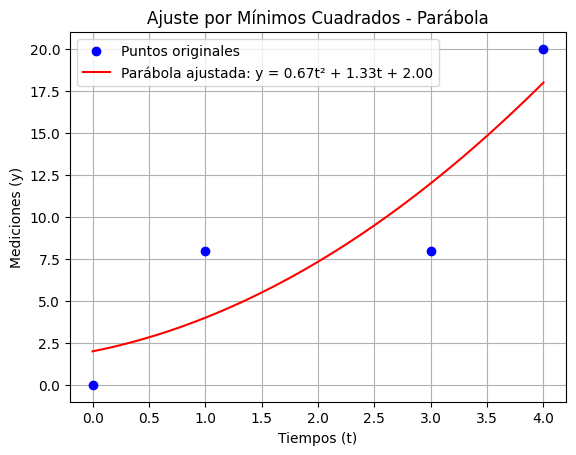

In [ ]:
# Genero un rango de tiempos para graficar la parábola suavemente
t_linea = np.linspace(min(tiempos), max(tiempos), 100)

# Uso los valores predichos con la fórmula cuadrática
mediciones_ajustadas_d = a * t_linea**2 + b * t_linea + c

# Graficar puntos originales
plt.plot(tiempos, mediciones, "bo", label="Puntos originales")

# Graficar la parábola ajustada
plt.plot(t_linea, mediciones_ajustadas_d, "r-", label=f"Parábola ajustada: y = {a:.2f}t² + {b:.2f}t + {c:.2f}")

# Añadir título y etiquetas
plt.title("Ajuste por Mínimos Cuadrados - Parábola")
plt.xlabel("Tiempos (t)")
plt.ylabel("Mediciones (y)")
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 2

In [ ]:
# Importo las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma  # Para usar la función Gamma

In [ ]:
# Creo ambos intervalos
# Este es el conjunto de puntos sobre los cuales evaluaremos nuestras funciones base
intervalo_1 = np.linspace(1, 2, 100)
intervalo_2 = np.linspace(0.1, 1, 100)

In [ ]:
# Creo las funciones base que voy a usar para construir mi matriz X
def funcion_1 (x):
  return np.exp(x)

def funcion_2(x):
  return np.sin(x)

def funcion_3(x):
  return gamma(x)

In [ ]:
# Creo ambas matrices X
X1 = np.column_stack([funcion_1(intervalo_1), funcion_2(intervalo_1), funcion_3(intervalo_1)])
X2 = np.column_stack([funcion_1(intervalo_2), funcion_2(intervalo_2), funcion_3(intervalo_2)])

In [ ]:
# Construyo el vector y (la función objetivo f(x) = x^{-1})
# Vamos a evaluar la función en cada punto de cada intervalo
y_1 = 1 / intervalo_1
y_2 = 1 / intervalo_2

In [ ]:
# Calculo los parámetros beta usando las ecuaciones normales
# beta = (X^T X)^(-1) X^T y
beta_1 = np.linalg.solve(X1.T @ X1, X1.T @ y_1)
beta_1

array([-0.10775933,  0.0094024 ,  1.28688409])

In [ ]:
beta_2 = np.linalg.solve(X2.T @ X2, X2.T @ y_2)
beta_2

array([ 0.63347491, -1.85510165,  1.00384954])

In [ ]:
# Calculo la aproximación usando los coeficientes beta obtenidos
# Esto produce un vector con los valores predichos g(x) para cada punto xi

aproximacion_1 = X1 @ beta_1  # Para el intervalo [1, 2]
aproximacion_2 = X2 @ beta_2  # Para el intervalo [0.1, 1]

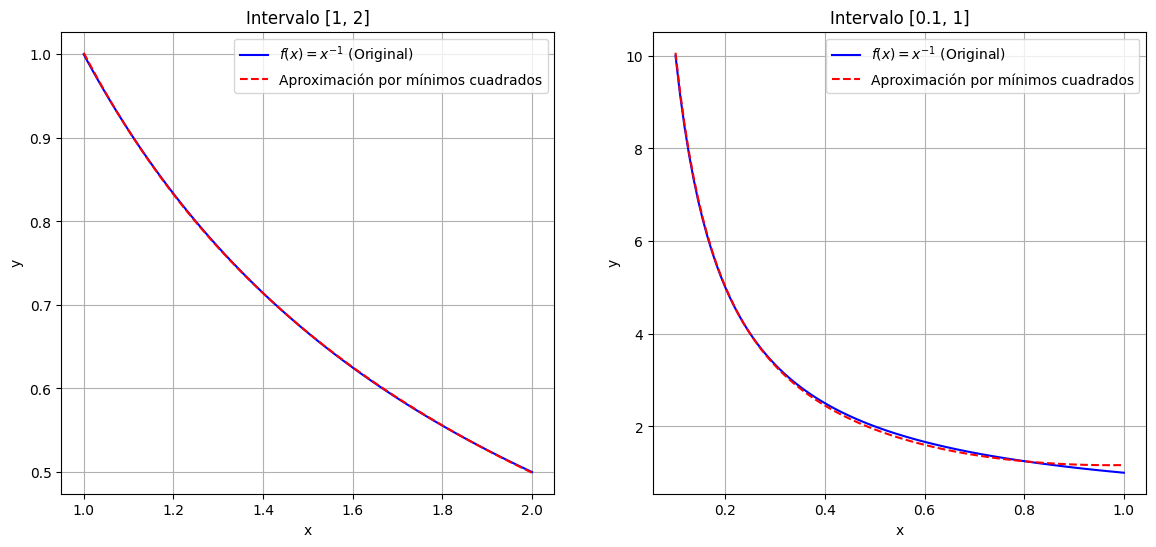

In [ ]:
# Grafico los resultados para comparar la función original y la aproximación obtenida

plt.figure(figsize=(14, 6))

# Intervalo [1, 2]
plt.subplot(1, 2, 1)
plt.plot(intervalo_1, y1, 'b', label='$f(x) = x^{-1}$ (Original)')
plt.plot(intervalo_1, aproximacion_1, 'r--', label='Aproximación por mínimos cuadrados')
plt.title('Intervalo [1, 2]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Intervalo [0.1, 1]
plt.subplot(1, 2, 2)
plt.plot(intervalo_2, y2, 'b', label='$f(x) = x^{-1}$ (Original)')
plt.plot(intervalo_2, aproximacion_2, 'r--', label='Aproximación por mínimos cuadrados')
plt.title('Intervalo [0.1, 1]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()